<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Line Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on using line charts to analyze trends over time and across different categories in a dataset.



## Objectives


In this lab you will perform the following:


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 177.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 182.4 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 118.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 139.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 135.8 MB/s eta 0:00:00


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



#### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


--2025-09-07 15:41:21--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  67.7MB/s    in 2.2s    

2025-09-07 15:41:24 (67.7 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



#### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt


#### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")


#### Display the first few rows to understand the structure of the data


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


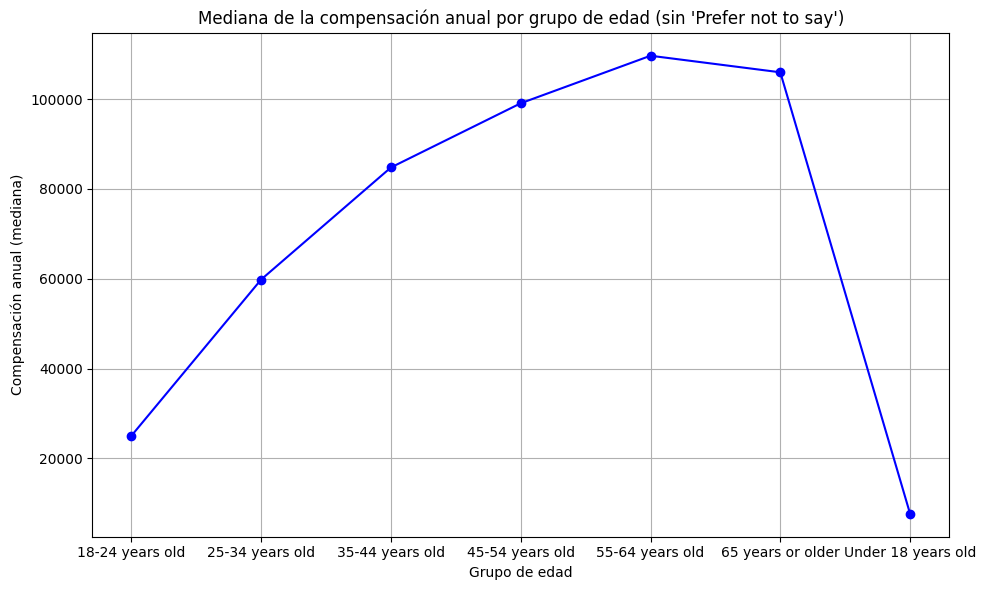

In [8]:
# Filtrar filas donde la columna Age no sea "Prefer not to say"
df_filtered = df[df["Age"] != "Prefer not to say"]

# Agrupar por grupo de edad y calcular la mediana de la compensación anual
compensation_by_age = df_filtered.groupby("Age")["ConvertedCompYearly"].median()

# Crear el gráfico de líneas
plt.figure(figsize=(10,6))
compensation_by_age.plot(kind="line", marker="o", color="blue")
plt.title("Mediana de la compensación anual por grupo de edad (sin 'Prefer not to say')")
plt.xlabel("Grupo de edad")
plt.ylabel("Compensación anual (mediana)")
plt.grid(True)
plt.tight_layout()
plt.show()



##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


In [11]:
df["Age"].unique()


array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

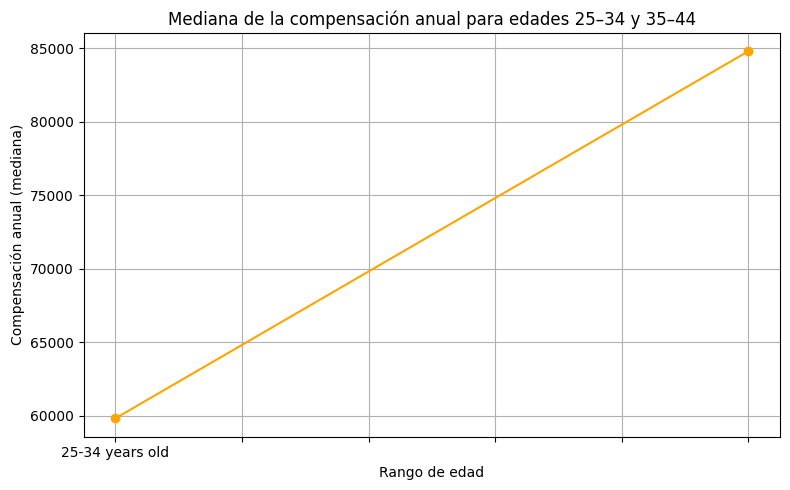

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
df = pd.read_csv("survey-data.csv")

# Filtrar filas donde la edad no sea "Prefer not to say"
df_filtered = df[df["Age"] != "Prefer not to say"]

# Filtrar solo los rangos de edad 25-34 y 35-44
df_age_ranges = df_filtered[df_filtered["Age"].isin(["25-34 years old", "35-44 years old"])]

# Agrupar por rango de edad y calcular la mediana de la compensación anual
comp_by_range = df_age_ranges.groupby("Age")["ConvertedCompYearly"].median()

# Crear el gráfico de líneas
plt.figure(figsize=(8,5))
comp_by_range.plot(kind="line", marker="o", color="orange")
plt.title("Mediana de la compensación anual para edades 25–34 y 35–44")
plt.xlabel("Rango de edad")
plt.ylabel("Compensación anual (mediana)")
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


In [13]:
df["YearsCodePro"].unique()


array([nan, '17', '27', '7', '11', '25', '12', '10', '3',
       'Less than 1 year', '18', '37', '15', '20', '6', '2', '16', '8',
       '14', '4', '45', '1', '24', '29', '5', '30', '26', '9', '33', '13',
       '35', '23', '22', '31', '19', '21', '28', '34', '32', '40', '50',
       '39', '44', '42', '41', '36', '38', 'More than 50 years', '43',
       '47', '48', '46', '49'], dtype=object)

In [14]:
df["JobSatPoints_6"].unique()

array([   nan,   0.  ,  25.  ,  30.  ,  60.  , 100.  ,  20.  ,  50.  ,
        15.  ,  10.  ,   5.  ,  80.  ,   8.  ,  65.  ,  90.  ,  75.  ,
        35.  ,  40.  ,  33.  ,  70.  ,  17.  ,   7.  ,  12.  ,  13.  ,
         9.  ,  21.  ,  18.  ,  95.  ,   2.  ,  45.  ,  34.  ,  16.  ,
        78.  ,  85.  ,   1.  ,  14.  ,  31.  ,  11.  ,  23.  ,  28.  ,
        81.  ,   6.25,   6.  ,  55.  ,   3.  ,  22.  ,  42.  ,   4.  ,
        89.  ,  99.  ,  12.5 ,  36.  ,  27.  ,  24.  ,  19.  ,  87.  ,
        88.  ,  29.  ,  33.33,  33.3 ,  37.  ,  39.  ,  77.  ,  68.  ,
        26.  ,  98.  ,  32.  ,  66.  ,  57.  ,  82.  ,  94.  ,  61.  ,
        43.  ,  69.  ,  76.  ,  73.  ,  17.5 ,  46.  ,  49.  ,  52.  ,
        97.  ,  96.  ,  67.  ,  91.  ,  86.  ,  56.  ,  41.  ,  74.  ,
        51.  ,  48.  ,  44.  ,  64.  ,  54.  ,  63.  ])

/tmp/ipykernel_299/1684979316.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["YearsCodePro"] = df_filtered["YearsCodePro"].apply(convert_experience)


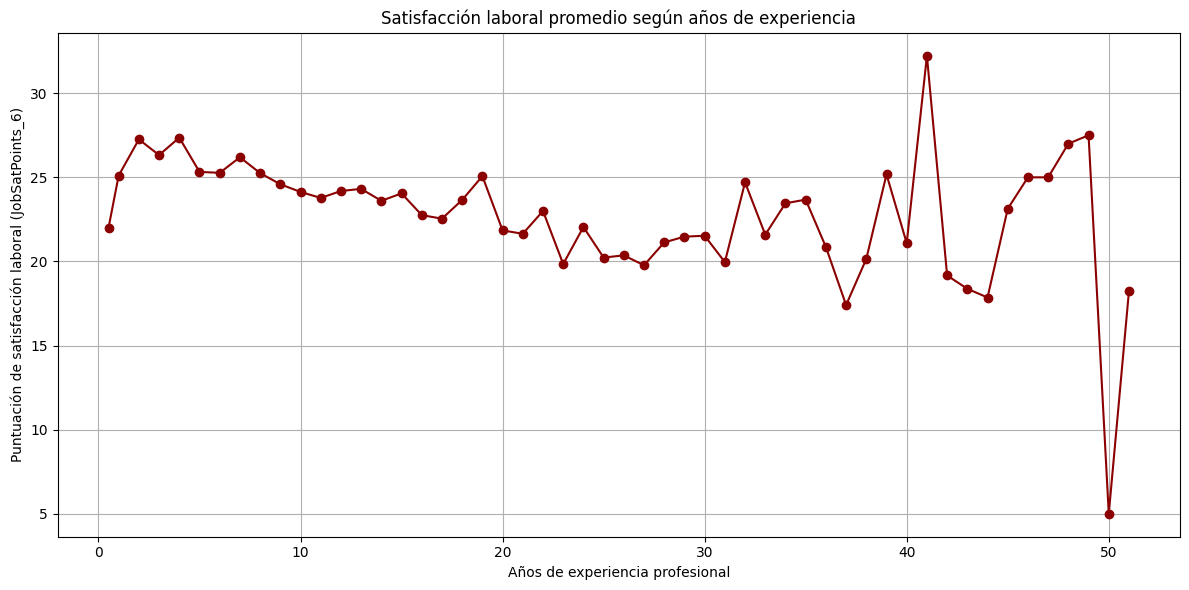

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
df = pd.read_csv("survey-data.csv")

# Eliminar filas con valores nulos en YearsCodePro o JobSatPoints_6
df_filtered = df[df["YearsCodePro"].notna() & df["JobSatPoints_6"].notna()]

# Función para convertir valores de YearsCodePro a numéricos
def convert_experience(val):
    if val == "Less than 1 year":
        return 0.5
    elif val == "More than 50 years":
        return 51
    else:
        try:
            return float(val)
        except:
            return None

# Aplicar la conversión
df_filtered["YearsCodePro"] = df_filtered["YearsCodePro"].apply(convert_experience)

# Agrupar por años de experiencia y calcular la media de satisfacción laboral
job_sat_by_exp = df_filtered.groupby("YearsCodePro")["JobSatPoints_6"].mean().sort_index()

# Crear el gráfico de líneas
plt.figure(figsize=(12,6))
job_sat_by_exp.plot(kind="line", marker="o", color="darkred")
plt.title("Satisfacción laboral promedio según años de experiencia")
plt.xlabel("Años de experiencia profesional")
plt.ylabel("Puntuación de satisfacción laboral (JobSatPoints_6)")
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


/tmp/ipykernel_299/3560671695.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["YearsCodePro"] = df_filtered["YearsCodePro"].apply(convert_experience)


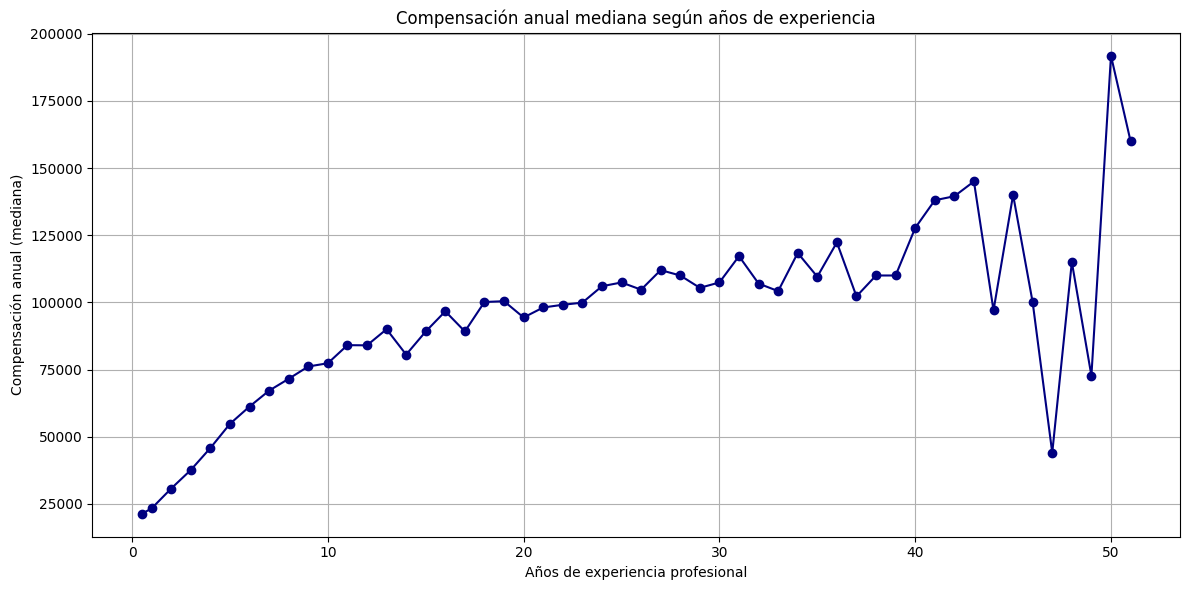

In [16]:
## Write your code hereimport pandas as pd
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
df = pd.read_csv("survey-data.csv")

# Eliminar filas con valores nulos en YearsCodePro o ConvertedCompYearly
df_filtered = df[df["YearsCodePro"].notna() & df["ConvertedCompYearly"].notna()]

# Función para convertir YearsCodePro a valores numéricos
def convert_experience(val):
    if val == "Less than 1 year":
        return 0.5
    elif val == "More than 50 years":
        return 51
    else:
        try:
            return float(val)
        except:
            return None

# Aplicar la conversión
df_filtered["YearsCodePro"] = df_filtered["YearsCodePro"].apply(convert_experience)

# Agrupar por años de experiencia y calcular la mediana de la compensación anual
comp_by_exp = df_filtered.groupby("YearsCodePro")["ConvertedCompYearly"].median().sort_index()

# Crear el gráfico de líneas
plt.figure(figsize=(12,6))
comp_by_exp.plot(kind="line", marker="o", color="navy")
plt.title("Compensación anual mediana según años de experiencia")
plt.xlabel("Años de experiencia profesional")
plt.ylabel("Compensación anual (mediana)")
plt.grid(True)
plt.tight_layout()
plt.show()


##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


/tmp/ipykernel_299/2378191128.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["YearsCodePro"] = df_filtered["YearsCodePro"].apply(convert_experience)


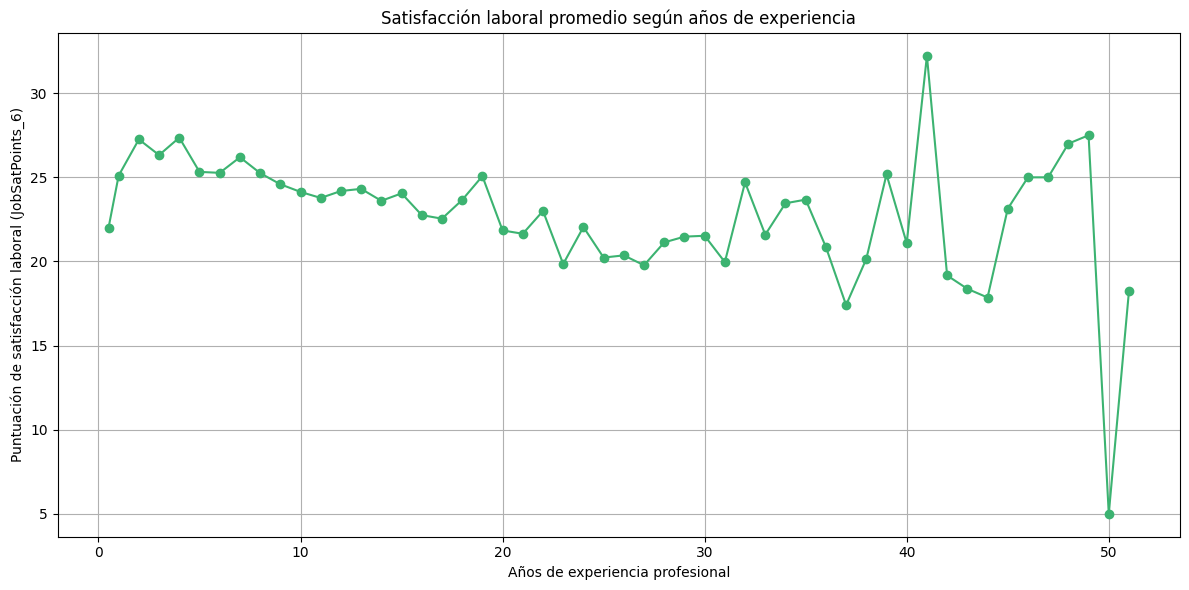

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
df = pd.read_csv("survey-data.csv")

# Eliminar filas con valores nulos en YearsCodePro o JobSatPoints_6
df_filtered = df[df["YearsCodePro"].notna() & df["JobSatPoints_6"].notna()]

# Función para convertir YearsCodePro a valores numéricos
def convert_experience(val):
    if val == "Less than 1 year":
        return 0.5
    elif val == "More than 50 years":
        return 51
    else:
        try:
            return float(val)
        except:
            return None

# Aplicar la conversión
df_filtered["YearsCodePro"] = df_filtered["YearsCodePro"].apply(convert_experience)

# Agrupar por años de experiencia y calcular la media de satisfacción laboral
job_sat_by_exp = df_filtered.groupby("YearsCodePro")["JobSatPoints_6"].mean().sort_index()

# Crear el gráfico de líneas
plt.figure(figsize=(12,6))
job_sat_by_exp.plot(kind="line", marker="o", color="mediumseagreen")
plt.title("Satisfacción laboral promedio según años de experiencia")
plt.xlabel("Años de experiencia profesional")
plt.ylabel("Puntuación de satisfacción laboral (JobSatPoints_6)")
plt.grid(True)
plt.tight_layout()
plt.show()


#### Final Step: Review


In this lab, you focused on analyzing trends in compensation and job satisfaction, specifically exploring how these metrics change with age and experience levels using line charts.


### Summary


In this lab, you explored essential data visualization techniques with a focus on analyzing trends using line charts. You learned to:

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, you gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
